In [2]:
import numpy as np
import pandas as pd
%matplotlib.inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
import tensorflow as tf
from tensorflow import keras

In [59]:
train_dir ='C:/Users/DEVU/Downloads/Dataset/Training'
validation_dir ='C:/Users/DEVU/Downloads/Dataset/Validation'
test_dir = 'C:/Users/DEVU/Downloads/Dataset/Testing'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
test_datage = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size =2,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size =2,
        class_mode='categorical')


Found 1440 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))

model.add(layers.Dense(6, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])



C:\Users\DEVU\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=120,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=240)

C:\Users\DEVU\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
120/120 [==============================] - 22s 179ms/step - loss: 1.8028 - acc: 0.1792 - val_loss: 1.7872 - val_acc: 0.1917
Epoch 2/40
120/120 [==============================] - 18s 151ms/step - loss: 1.7818 - acc: 0.2042 - val_loss: 1.7594 - val_acc: 0.2354
Epoch 3/40
120/120 [==============================] - 19s 160ms/step - loss: 1.7338 - acc: 0.3000 - val_loss: 1.7267 - val_acc: 0.2542
Epoch 4/40
120/120 [==============================] - 20s 164ms/step - loss: 1.6922 - acc: 0.2875 - val_loss: 1.7029 - val_acc: 0.2750
Epoch 5/40
120/120 [==============================] - 23s 194ms/step - loss: 1.6858 - acc: 0.3292 - val_loss: 1.6831 - val_acc: 0.2667
Epoch 6/40
120/120 [==============================] - 21s 177ms/step - loss: 1.6298 - acc: 0.3083 - val_loss: 1.6705 - val_acc: 0.2917
Epoch 7/40
120/120 [==============================] - 21s 172ms/step - loss: 1.6116 - acc: 0.3833 - val_loss: 1.6608 - val_acc: 0.3083
Epoch 8/40
120/120 [==============================] - 2

NameError: name 'plt' is not defined

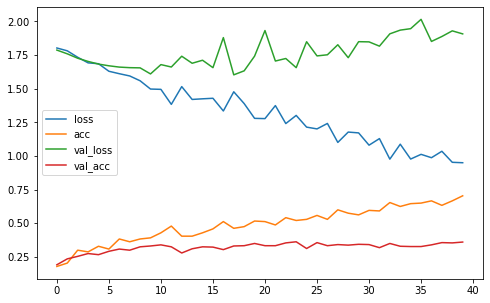

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylin(0,1)
plt.show()

In [32]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range =0.2,
        zoom_range = 0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=4,
        class_mode ="categorical")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=4,
        class_mode ='categorical')

Found 1440 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation = 'relu', ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation = "relu"))

model.add(layers.Dense(6, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [21]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=120,
        epochs = 40,
        validation_data = validation_generator,
        validation_steps = 240
)

Epoch 1/40
120/120 [==============================] - 18s 151ms/step - loss: 1.6798 - acc: 0.3250 - val_loss: 1.6635 - val_acc: 0.2625
Epoch 2/40
120/120 [==============================] - 19s 158ms/step - loss: 1.6535 - acc: 0.3375 - val_loss: 1.7172 - val_acc: 0.2875
Epoch 3/40
120/120 [==============================] - 18s 149ms/step - loss: 1.6671 - acc: 0.2979 - val_loss: 1.6477 - val_acc: 0.3000
Epoch 4/40
120/120 [==============================] - 20s 163ms/step - loss: 1.6274 - acc: 0.3146 - val_loss: 1.6587 - val_acc: 0.2708
Epoch 5/40
120/120 [==============================] - 19s 156ms/step - loss: 1.6100 - acc: 0.3729 - val_loss: 1.6733 - val_acc: 0.3125
Epoch 6/40
120/120 [==============================] - 20s 163ms/step - loss: 1.5956 - acc: 0.3521 - val_loss: 1.6255 - val_acc: 0.3417
Epoch 7/40
120/120 [==============================] - 19s 157ms/step - loss: 1.6079 - acc: 0.3500 - val_loss: 1.6296 - val_acc: 0.3042
Epoch 8/40
120/120 [==============================] - 2

In [22]:
model.save("Assignment_cnn.h5")

NameError: name 'plt' is not defined

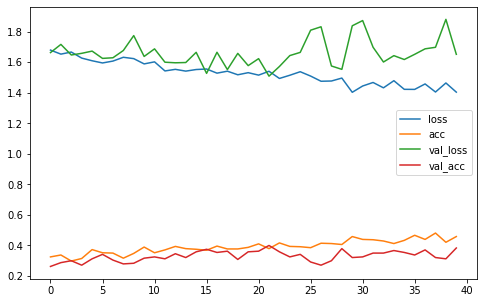

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top= False, input_shape = (150,150,3))

58900480/58889256 [==============================] - 18s 0us/step


In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [31]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])


C:\Users\DEVU\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [38]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-(epoch:02d).h5",save_best_only=True)

In [46]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs = 10,
        validation_data = validation_generator,
        validation_steps = 40,
        callbacks = [checkpoint_cb])

Epoch 1/10
20/20 [==============================] - 35s 2s/step - loss: 1.3390 - acc: 0.5250 - val_loss: 1.5244 - val_acc: 0.4500
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 1.2966 - acc: 0.5250 - val_loss: 1.5665 - val_acc: 0.4313
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 1.5013 - acc: 0.4000 - val_loss: 1.3958 - val_acc: 0.4250
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 1.3514 - acc: 0.5375 - val_loss: 1.2866 - val_acc: 0.5250
Epoch 5/10
20/20 [==============================] - 33s 2s/step - loss: 1.2992 - acc: 0.4625 - val_loss: 1.4325 - val_acc: 0.4437
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 1.2946 - acc: 0.5125 - val_loss: 1.5059 - val_acc: 0.4313
Epoch 7/10
20/20 [==============================] - 33s 2s/step - loss: 1.3314 - acc: 0.5125 - val_loss: 1.3871 - val_acc: 0.4500
Epoch 8/10
20/20 [==============================] - 33s 2s/step - loss: 1.3497 - acc: 0.46

In [62]:
test_generator = test_datage.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=4)

Found 0 images belonging to 0 classes.


In [53]:
model.evaluate_generator(test_generator,steps=120)

C:\Users\DEVU\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


ValueError: Asked to retrieve element 0, but the Sequence has length 0